In [ ]:
from sklearn.manifold import TSNE
from gensim.models import FastText
import matplotlib.pyplot as plt
import numpy as np
import torch
from tqdm import tqdm
from utilities import *
from ATT_MIL import *
from CONSTANTS import *
from sklearn.model_selection import train_test_split
import pandas as pd
from plot_utilities import plot_tsne_virus_embeddings



In [2]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ATT_MIL(N_HEAD, ENCODER_N_LAYERS, EMBEDDING_SIZE, INTERMIDIATE_DIM).to(device)
model.load_state_dict(torch.load("./models/model_weights.pth", map_location=torch.device('cpu')))
model.eval()
ft_model = FastText.load("./models/ft_skipgram.model")

c:\Users\LAPTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [4]:
file_name_ncbi_datas="./processed-data-csv/ncbi_cleaned_train_data.csv"
file_name_gasaid_datas="./processed-data-csv/gasaid_cleaned_train_data.csv"


df_gasaid=read_data_from_csv(file_name_gasaid_datas)
df_ncbi=read_data_from_csv(file_name_ncbi_datas)


df = pd.concat([df_gasaid, df_ncbi], ignore_index=True)

get_lsub_sequence(df)



llongest 775
lshortest 201


In [ ]:
df["Class"] = df["Class"].str.lower()  
labels = np.array((df["Class"] != "human").astype(int))  ## human->0  animal->1

ids=df["Virus_ID"]
seq_ids=df["Seq_ID"]+" "+df["Virus_ID"]

# convert string id to numeric
_,ids = np.unique(ids, return_inverse=True)
_,seq_ids = np.unique(seq_ids, return_inverse=True)

In [ ]:

datas=df["Sequence"]
# Get unique bag IDs
unique_bag_ids = np.unique(ids)

# Split bag IDs into train and test
train_ids, val_ids = train_test_split(unique_bag_ids, test_size=0.2, random_state=42)

# Get indices corresponding to train/test bag IDs
train_indices = np.where(np.isin(ids, train_ids))[0]
val_indices = np.where(np.isin(ids, val_ids))[0]

# Create train data
train_datas = datas[train_indices]
train_ids = ids[train_indices]
train_seq_ids = seq_ids[train_indices]
train_labels = labels[train_indices]



# Create val data
val_datas = datas[val_indices]
val_ids = ids[val_indices]
val_seq_ids = seq_ids[val_indices]
val_labels = labels[val_indices]

print("length of train ",train_datas.shape)
print("length of validation ",val_datas.shape)


length of train  (76702,)
length of validation  (19328,)


Processing Viruses: 100%|██████████| 8907/8907 [17:12<00:00,  8.63it/s]
c:\Users\LAPTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


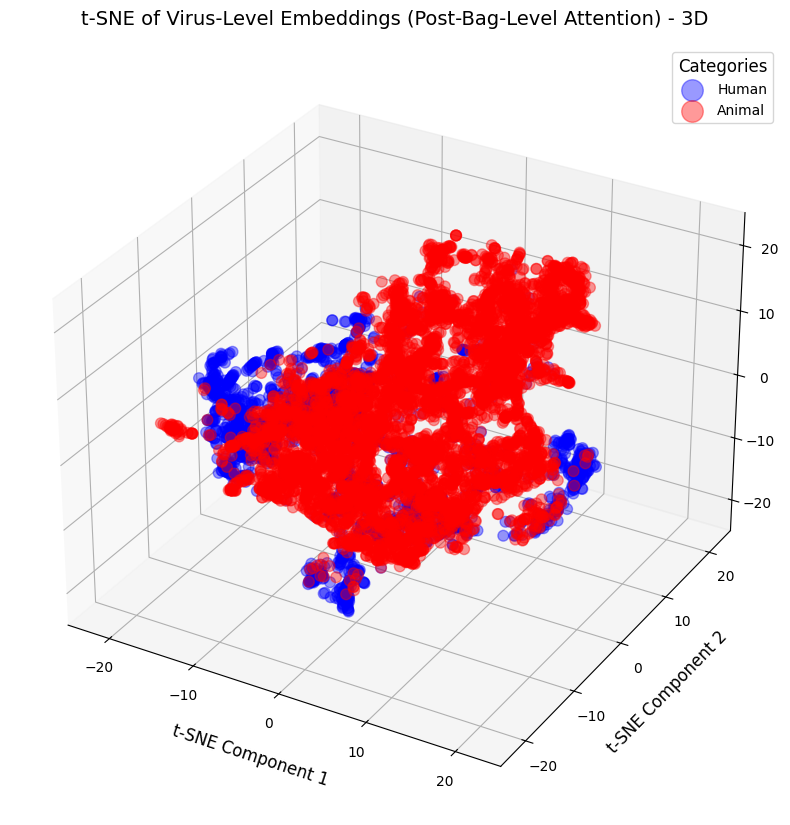

In [8]:
plot_tsne_virus_embeddings(model, ft_model, train_datas, train_labels, train_ids, train_seq_ids
                        ,sample_size=10000)
